# Setup and downloading data

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 31.7 MB/s 
     |████████████████████████████████| 1.2 MB 40.9 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 51 kB 324 kB/s 
     |████████████████████████████████| 561 kB 45.8 MB/s 
     |████████████████████████████████| 130 kB 47.2 MB/s 
Mounted at /content/gdrive


In [2]:
DATA = Path('/content/gdrive/MyDrive/DAT255/formula1-classifier')
DATA.mkdir(exist_ok=True, parents=True)

In [3]:
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
if not os.path.isfile(DATA/'formula-one-cars.zip'):
    !kaggle datasets download -d vesuvius13/formula-one-cars -p $DATA

# Exploring data

In [5]:
import shutil
if not os.path.exists(DATA/'Formula One Cars'):
    shutil.unpack_archive(DATA/'formula-one-cars.zip', extract_dir=DATA)

In [6]:
DATA.ls()

(#4) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/formula-one-cars.zip'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/models'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/images')]

In [7]:
(DATA/'Formula One Cars').ls()

(#8) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Ferrari F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/McLaren F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Mercedes F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Racing Point F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Red Bull Racing F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Renault F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Williams F1 car')]

In [8]:
path = DATA/'Formula One Cars'
(path/'AlphaTauri F1 car').ls()

(#123) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000005.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000010.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000011.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000014.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000015.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000018.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000020.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000022.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000024.jpg'),Path('/content/gdrive/MyDrive

In [9]:
test_img = (path/'AlphaTauri F1 car').ls()[0]
test_img

Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000005.jpg')

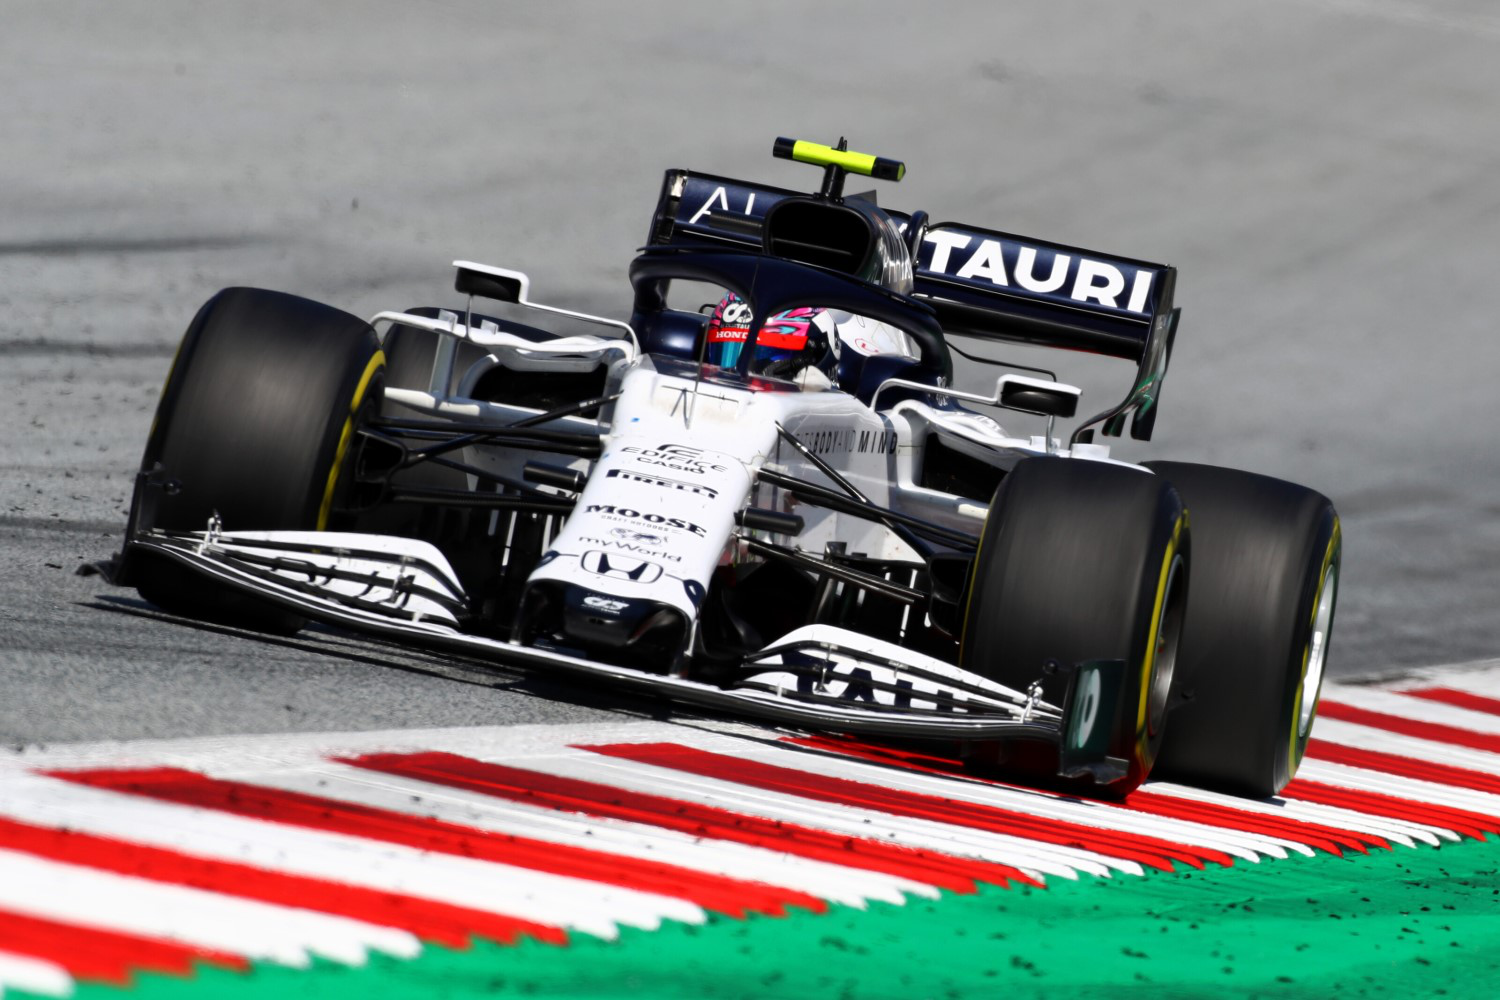

In [10]:
img = load_image(test_img)
img

In [11]:
img.shape

(1000, 1500)

In [32]:
for img in (path/'Williams F1 car').ls()[:5]:
    img = load_image(img)
    #display(img)
    print(img.shape)
    print("#"*40)

(1080, 1080)
########################################
(900, 1600)
########################################
(432, 768)
########################################
(533, 800)
########################################
(3456, 5184)
########################################


# Clean dataset

In [13]:
from PIL import Image
for team_folder in os.listdir(path):
    team_path = os.path.join(path, team_folder)
    for img_file in os.listdir(team_path):
      img_path = os.path.join(team_path, img_file)
      try:
        img = Image.open(img_path)
        img.verify()
      except:
        print(f"Deleting '{team_folder}/{img_file}' because of curruption")
        os.remove(img_path)

# Create data loader

In [14]:
dls = ImageDataLoaders.from_folder(path, train = ["train"], valid_pct=0.2)

In [15]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = cars.dataloaders(path)

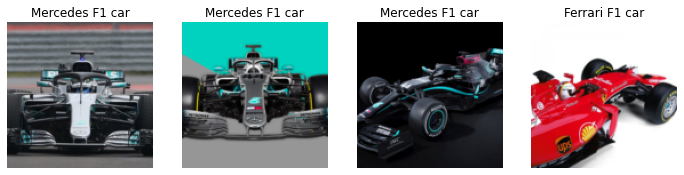

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

# Train model

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=0.001737800776027143)

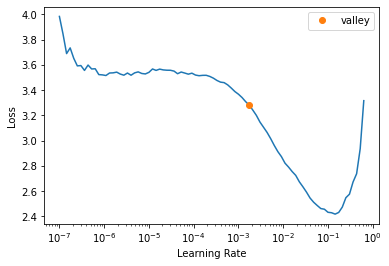

In [19]:
learn.lr_find()

In [20]:
learn.fine_tune(4, 1.7e-3)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

# Evaluation

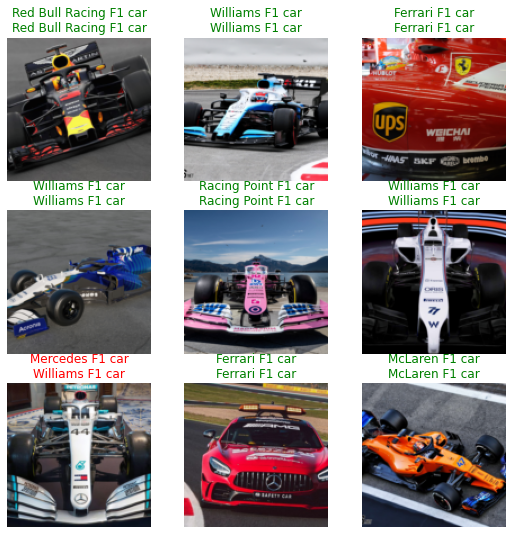

In [21]:
learn.show_results()

In [22]:
interp = Interpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [23]:
def plot_top_losses_fix(interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs, nrows=8, )
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)

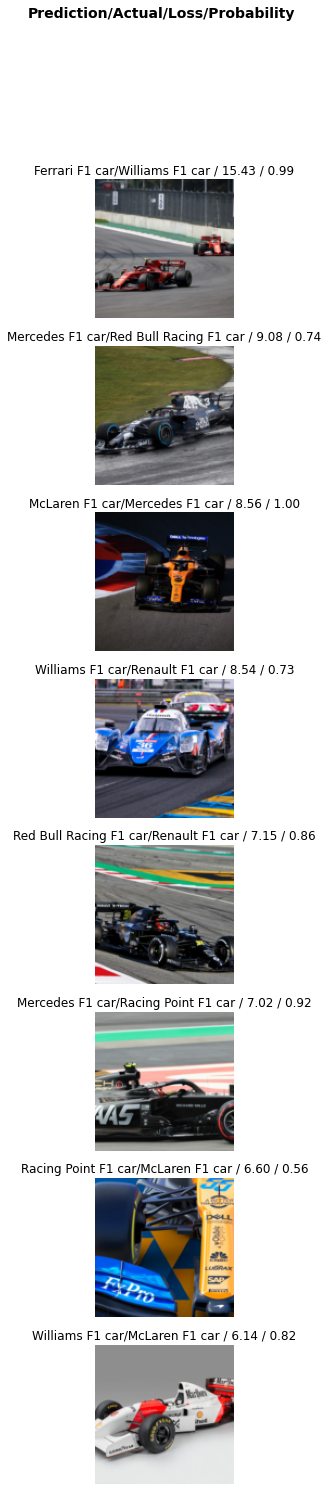

In [24]:
plot_top_losses_fix(interp, k=8)

In [25]:
from fastai.vision.widgets import *

In [26]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [27]:
a = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


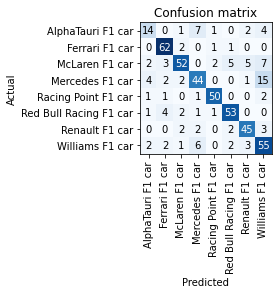

In [28]:
a.plot_confusion_matrix()

In [31]:
from google.colab import files
files.upload()

{}

In [29]:
pip install fastai-amalgam

In [ ]:
from utils import gradcam

In [ ]:
for img in random.choices(dls.valid_ds, k=12):
  plt.imshow(img[0])
  plt.show()

In [ ]:
img = dls.valid_ds[0]
img[0]
gcam = gradcam(learn, img[0], show_original=True)
#plt.imshow(img[0])

In [ ]:
for img in random.choices(dls.valid_ds, k=12):
    gcam = gradcam(learn, img[0], show_original=True)
    f = plt.figure(figsize=(10,8))
    plt.imshow(gcam)
    plt.title(f"Activity: {img[1]}")
    plt.axis('off')
    plt.show()

In [ ]:
(DATA).ls()

(#3) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/formula-one-cars.zip'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/models')]

In [ ]:
NB_DIR = Path.cwd()
MODELS = DATA/'models'
MODELS.mkdir(exist_ok=True)

In [ ]:
learn.export(MODELS/'f1_classifier_v2')